# Overview
 ### In this project I will use TMDb Movie data set which this data set contains information about 10,000 
 
### movies collected from The Movie Database (TMDb), including user ratings and revenue, also i will wrangle

### and analyze this data set to answer the following questions:
 - Movies with highest and lowest runtime
 - Movies average runtime
 - Movies with highest and lowest budget
 - Movies with highest and lowest revenue
 - Movies with highest and lowest profit
 - Discuss for each year, sum of profits of movies 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering

In [4]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Assessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
sum(df.duplicated())

1

In [7]:
df.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3214,22007,tt1015474,0.241170,0,0,Train,Thora Birch|Gideon Emery|Gloria Votsis|Derek M...,NaN,Gideon Raff,You're in for a hell of a ride.,...,This new Train tells the tale of an American w...,94,Horror|Thriller,Nu Image Films|Millennium Films,10/16/08,19,4.9,2008,0.000000e+00,0.000000e+00
1659,14853,tt1214983,0.370303,0,0,Screamers: The Hunting,Stephen Amell|Greg Bryk|Stephen Patrick Dunn|L...,NaN,Sheldon Wilson,The Perfect Weapon Is Now The Ultimate Killing...,...,A group of humans arrive on Sirius 6-B to inve...,94,Action|Horror|Science Fiction,Pope Productions,2/17/09,17,4.2,2009,0.000000e+00,0.000000e+00
122,277355,tt1945084,1.342839,0,0,Everly,Salma Hayek|Hiroyuki Watanabe|Jennifer Blanc|T...,NaN,Joe Lynch,Enter if you dare.,...,"After she betrays a powerful mob boss, a woman...",90,Thriller|Action,Crime Scene Pictures|Radius-TWC|Anonymous Cont...,1/23/15,169,5.1,2015,0.000000e+00,0.000000e+00
1005,206296,tt2474024,0.318608,0,0,The Last Five Years,Anna Kendrick|Jeremy Jordan|Natalie Knepp|Bett...,NaN,Richard LaGravenese,There are two sides to every love story.,...,"In New York, a struggling actress and a succes...",94,Comedy|Drama|Music|Romance,Lucky Monkey Pictures|Sh-K-Boom Records|Grand ...,11/3/14,108,5.4,2014,0.000000e+00,0.000000e+00
6686,13967,tt0482546,0.620633,30000000,35078241,Miss Potter,Ewan McGregor|RenÃ©e Zellweger|Emily Watson|Ba...,NaN,Chris Noonan,The life of Beatrix Potter is the most enchant...,...,"The story of Beatrix Potter, the author of the...",92,Drama|Family|Romance,BBC Films,12/3/06,81,6.2,2006,3.245007e+07,3.794305e+07
2032,23759,tt1020558,0.804348,12000000,6814789,Centurion,Michael Fassbender|Olga Kurylenko|David Morris...,http://www.centurionmovie.com/,Neil Marshall,History is written in blood,...,"Britain, A.D. 117. Quintus Dias, the sole surv...",97,Drama|Action|Thriller,PathÃ© Pictures International|UK Film Council|...,2/15/10,198,5.7,2010,1.200000e+07,6.814789e+06
2590,31582,tt0155711,0.186474,0,4488529,Flawless,Robert De Niro|Philip Seymour Hoffman|Barry Mi...,NaN,Joel Schumacher,NaN,...,An ultraconservative police officer suffers a ...,112,Comedy|Drama,Metro-Goldwyn-Mayer (MGM),11/26/99,24,6.2,1999,0.000000e+00,5.875722e+06
8596,17795,tt0117119,0.338300,0,0,My Fellow Americans,Jack Lemmon|James Garner|Dan Aykroyd|John Hear...,NaN,Peter Segal,"A comedy about life, liberty and the pursuit o...",...,They used to run the country. Now they're runn...,101,Comedy|Drama,Warner Bros.|Storyline Entertainment|Peters En...,12/20/96,14,6.9,1996,0.000000e+00,0.000000e+00
6738,7304,tt0404390,0.433874,15000000,9500000,Running Scared,Paul Walker|Cameron Bright|Vera Farmiga|Chazz ...,http://www.runningscaredthemovie.com/,Wayne Kramer,Every bullet leaves a trail.,...,"After a drug-op gone bad, Joey Gazelle is put ...",122,Action|Crime|Drama|Thriller,International Production Company|True Grit Pro...,1/6/06,174,6.8,2006,1.622504e+07,1.027586e+07
282,293970,tt2118624,0.441882,0,0,The Final Girls,Taissa Farmiga|Malin Ã…kerman|Nina Dobrev|Alex...,NaN,Todd Strauss-Schulson,NaN,...,"A young woman grieving the loss of her mother,...",91,Horror|Comedy,Groundswell Productions|Ulterior Productions|S...,10/9/15,211,6.6,2015,0.000000e+00,0.000000e+00


In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

# Cleaning
  ## Quality
   ### Visual assessment
   - Replace '0' in columns budget, revenue, runtime with 'NAN'
  ## Tidness
   - Removing unused columns ('id', 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj')     
   
   - Adding column which represent the profit of movies (revenue - budget)
   
   
   ### Programmatic Assessment:
  
  - data type of release_date column should be in date format.             
  
  - id column convert its data type to str.                                
  
  - convert release_year data type from int to str.                        
  
  - removing duplicate rows from data set.                                 
   

In [9]:
# making a copy from original datset to start cleaning Quality and Tidness issuess
df_clean = df.copy()

# Define
 - Fix data types of:
 - 1- release_date change to datetime format
 - 2- id columns to string data type
 - 3- release_year to string data type

# Code

In [10]:
# Change release_date data type to datetime format
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

In [11]:
# Change id column from int to string
df_clean['id'] = df_clean['id'].apply(str)

In [12]:
# Change release_year from int ro srtring
df_clean['release_year'] = df_clean['release_year'].apply(str)

# Test

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  object        
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

# Define 
- Removing duplicate rows from data set

# Code

In [14]:
df_clean.drop_duplicates(inplace= True)

# Test

In [15]:
sum(df_clean.duplicated())

0

# Define 
 - Removing unused columns ('id', 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj')

# Code

In [16]:
# Making a list for columns that will remove
drop_columns = ['id', 'imdb_id', 'popularity', 'homepage', 'keywords', 
                'overview', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']

In [17]:
df_clean.drop(drop_columns, axis=1 , inplace = True)

# Test

In [18]:
df_clean.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'tagline',
       'runtime', 'genres', 'release_date', 'release_year'],
      dtype='object')

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          10865 non-null  int64         
 1   revenue         10865 non-null  int64         
 2   original_title  10865 non-null  object        
 3   cast            10789 non-null  object        
 4   director        10821 non-null  object        
 5   tagline         8041 non-null   object        
 6   runtime         10865 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   release_year    10865 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 933.7+ KB


# Define
 - Replace '0' with 'NAN' in columns: 
 - 1- budget 
 - 2-revenue 
 - 3-runtime 


# Code

In [20]:
df_clean['budget'] =df_clean['budget'].replace(0, np.NAN)

In [21]:
df_clean['revenue'] =df_clean['revenue'].replace(0, np.NAN)

In [22]:
df_clean['runtime'] =df_clean['runtime'].replace(0, np.NAN)

# Test

In [23]:
df_clean[df_clean['budget'] == 0]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year


In [24]:
df_clean[df_clean['revenue'] == 0]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year


In [25]:
df_clean[df_clean['runtime'] == 0]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year


# Define
  - Removing all rows with NAN values for better  analysis and visualization of data

# Code

In [26]:
df_clean.dropna(axis = 0 , inplace = True)

In [27]:
df_clean['budget']=df_clean['budget'].astype(np.int64)
df_clean['revenue']=df_clean['revenue'].astype(np.int64)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3572 non-null   int64         
 1   revenue         3572 non-null   int64         
 2   original_title  3572 non-null   object        
 3   cast            3572 non-null   object        
 4   director        3572 non-null   object        
 5   tagline         3572 non-null   object        
 6   runtime         3572 non-null   float64       
 7   genres          3572 non-null   object        
 8   release_date    3572 non-null   datetime64[ns]
 9   release_year    3572 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 307.0+ KB


# Define
### Adding column which represent the profit of movies (revenue - budget)

# Code

In [29]:
# For best analysis i will add profit column (revenue - budget)
df_clean.insert(2, 'profit', df_clean['revenue'] - df_clean['budget'])

# Test

In [30]:
df_clean.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,2015


# Storing Data

In [31]:
df_clean.to_csv('tmdb-enhanced-data.csv', index = False)

In [32]:
# Making copy of cleaned data to start analyzing it.
df2 = df_clean.copy()

# Analysis and Visualization of Data

### Highest and lowest run time for Movies

In [42]:
def highest_and_lowest(most_least):
    # detect the movie with high budget
    highest = df2[most_least].idxmax()
    high_details = pd.DataFrame(df2.loc[highest])
    
    # detect the movie with lowest budget
    lowest = df2[most_least].idxmin()
    low_details = pd.DataFrame(df2.loc[lowest])
    
    #Concat two data frames for best comparison
    high_low_info = pd.concat([high_details, low_details], axis=1)
    
    return high_low_info
# Calling the function
highest_and_lowest('runtime')
    

,2107,8005
budget,18000000,3000000
revenue,871279,21000000
profit,-17128721,18000000
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
tagline,The man who hijacked the world,He's back! Mickey Mouse - in his first new mot...
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation
release_date,2010-05-19 00:00:00,1983-10-19 00:00:00


- Movie with id 2017 show the longest run time in data set which about 338 minutes
- Movie with id 8005 show the lowest run time which about 26 minute

### Movies that have highest and lowest budgets

In [45]:
# Calling the function to show highest and lowest budget
highest_and_lowest('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Movies with highest and lowest revenue

In [46]:
# Calling the function to show highest and lowest revenue
highest_and_lowest('revenue')
    

,1386,8142
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
release_date,2009-12-10 00:00:00,1995-10-20 00:00:00


### Movies with highest and lowest Profit

In [47]:
def profit(most_least_profit):
    # detect the movie with high budget
    high_profit = df2[most_least_profit].idxmax()
    high_profit_details = pd.DataFrame(df2.loc[high_profit])
    
    # detect the movie with lowest budget
    low_profit = df2[most_least_profit].idxmin()
    low_profit_details = pd.DataFrame(df2.loc[low_profit])
    
    #Concat two data frames for best comparison
    profit_info = pd.concat([high_profit_details, low_profit_details], axis=1)
    
    return profit_info

# Calling the function
profit('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


## Discuss for each year, sum of profits of movies 

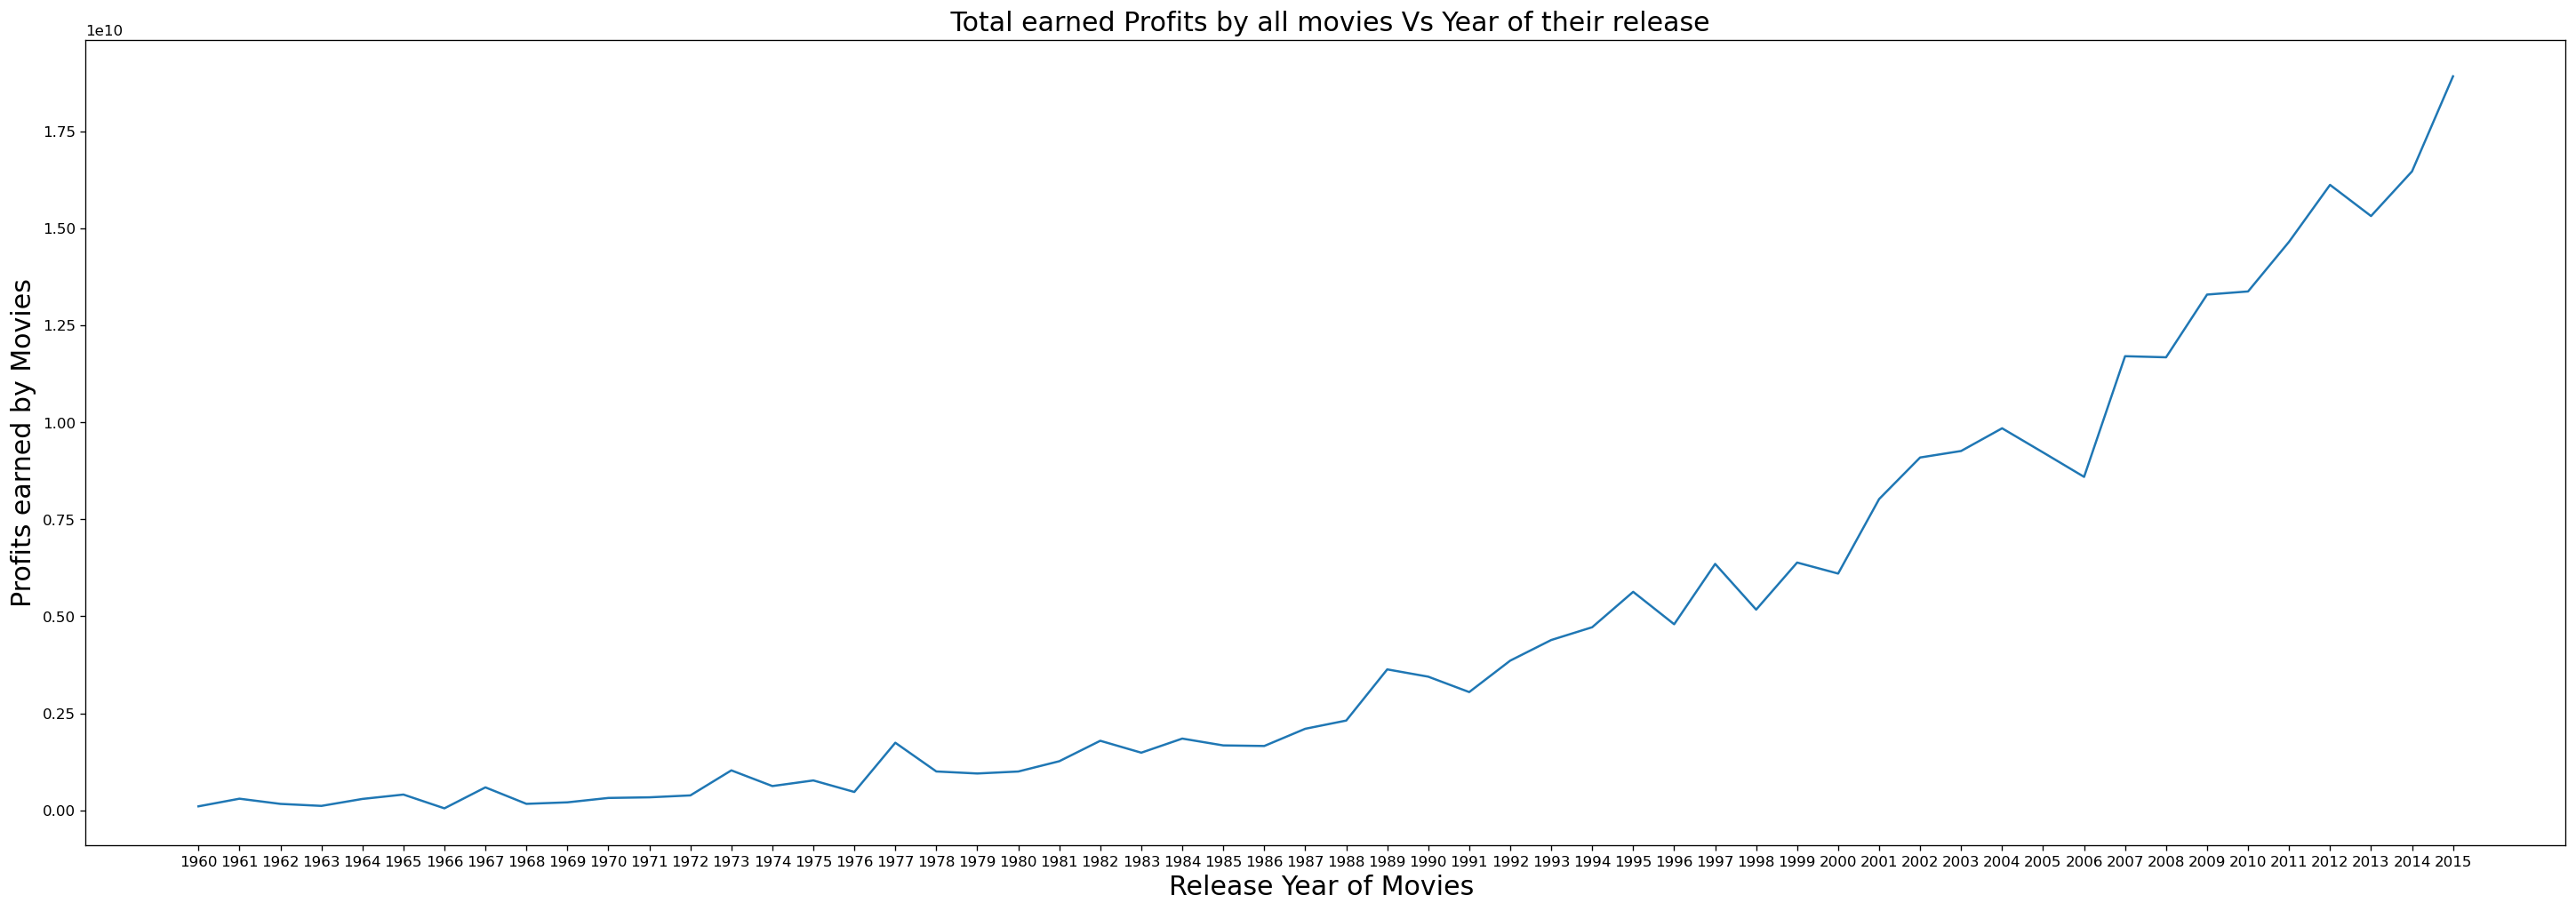

In [39]:
profits_per_year = df2.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(30,10), dpi = 120)

#Rename x-axis
plt.xlabel('Release Year of Movies ', fontsize = 18)

# Rename y-axis
plt.ylabel('Profits earned by Movies', fontsize = 18)

#title of the line plot
plt.title(' Total earned Profits by all movies Vs Year of their release', fontsize = 18)

#plotting the graph
plt.plot(profits_per_year)

#displaying the line plot
plt.show()

From above plot i realized that 2015 has most no.of profitable movies

In [60]:
# To prove my conclusion 
profits_per_year.idxmax()

'2015'

### Average run time

In [61]:
def average(avg):
    average = df2[avg].mean()
    return average

# Calling the function
average('runtime')

109.12290033594626

In [58]:
df2['runtime'].describe()

count    3572.000000
mean      109.122900
std        19.686816
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

## By looking to above statistics i realized that:
  - 25% of the movies have a runtime of less than 95 minutes
  - 50% (median) of movies have a runtime of less than 109 minutes.
  - 75% of movies have a runtime of less than 119 minutes

### plotting a histogram for runtime of movies
  - The average runtime of a movie is 109 minutes. Now I'll analyse this value from a visual perspective

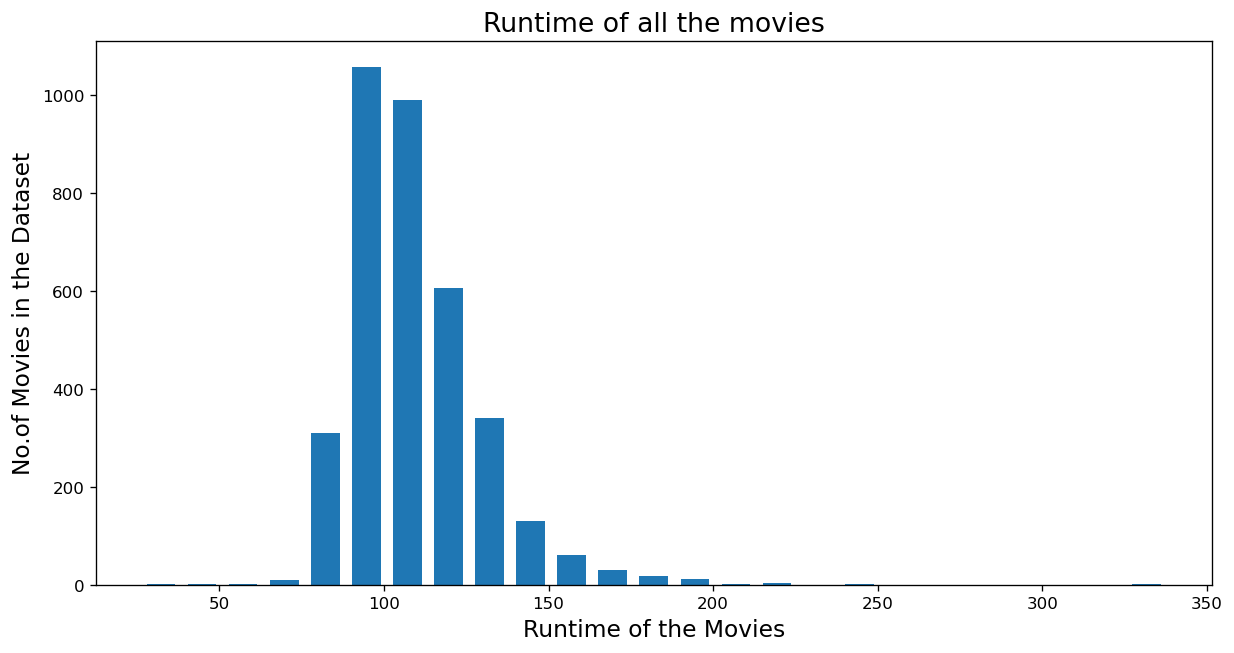

In [41]:
plt.figure(figsize=(12,6), dpi = 120)

# x-axis title 
plt.xlabel('Runtime of the Movies', fontsize = 14)
# y-axis title 
plt.ylabel('No.of Movies in the Dataset', fontsize=14)
# graph title
plt.title('Runtime of all the movies', fontsize=16)

# histogram plot
plt.hist(df2['runtime'], rwidth = 0.7, bins =25)

plt.show()

The distribution of the above graph is positively or right skewed, so most of the movies duarations in range from 80 to 115 minutes. Almost 1000 and more no.of movies fall in this range of run time

### Statistical Properties of profit

In [50]:
df2.profit.describe()

count    3.572000e+03
mean     7.511899e+07
std      1.545935e+08
min     -4.139124e+08
25%     -5.251055e+05
50%      2.317012e+07
75%      8.958184e+07
max      2.544506e+09
Name: profit, dtype: float64

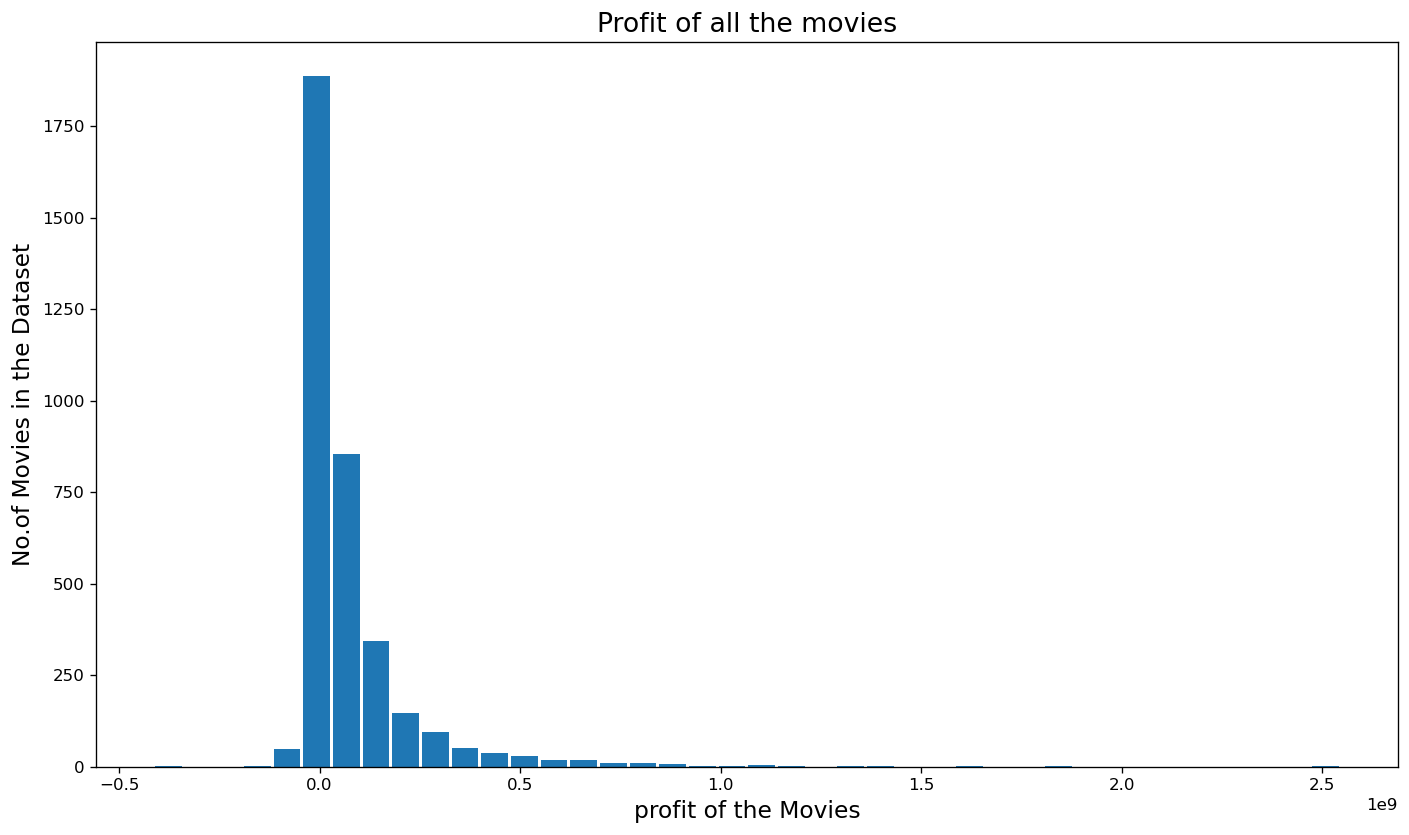

In [51]:
plt.figure(figsize=(14,8), dpi = 120)

# x-axis title 
plt.xlabel('profit of the Movies', fontsize = 14)
# y-axis title 
plt.ylabel('No.of Movies in the Dataset', fontsize=14)
# graph title
plt.title('Profit of all the movies', fontsize=16)

# histogram plot
plt.hist(df2['profit'], rwidth = 0.9, bins =40)

plt.show()

### By looking to the above statistics i realized that:
   - 25% of the movies have a negative profit which mean that these movies was failed and have the revenue less than main budget 
   - 50% (median) of movies have a Profit  less than 75118992.
   - 75% of movies have a Profit  above mean average (75118992)

The distribution of the above graph is positively or right skewed i realized that:
- More than 1750 movies have 0 budget which is limitation of data  
- More than 750 of movies profit in range from 100 Millon to 500 Million 

## Discuss the characteristics that lead to profitable movie

In [52]:
# I will take a data set which the profit is more than mean average
profit_new_data = df2[df2['profit'] >= df2.profit.mean()]

#reindexing new data
profit_new_data.index = range(len(profit_new_data))

#i will start indexing from 1 instead of 0
profit_new_data.index = profit_new_data.index + 1

#printing the new dataset
profit_new_data.head(5)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,2015


### Relation between profit and budget

In [53]:
def profit_average(avg):
    return profit_new_data[avg].mean()
# Calling function to calculate average for budget columns
profit_average('budget')

67811342.347181

  - So the movies having profit of 75 million dollar and more have an average budget about 67 million dollar.

### Relation between profit and revenue

In [54]:
# Calling function to calculate average for revenue columns
profit_average ('revenue')

303556218.9070228

 - So the movies having profit of 75 million dollar and more should have an average revenue about 303  million dollar.

### Relation between Profit and run time

In [55]:
# Calling function to calculate average for runtime columns
profit_average('runtime')

114.87932739861523

 - So the movies having profit of 75 million dollar and more should have an average runtime about 114  minutes.

## Conclucion
Afte analyzing of TMDb dataset and abstract conclusions after each analysis or visualtion step there was some final thoughts i will share:

- For a Movie in order to be considered in a successful criteria:
  - Average Budget must be around 67 millon dollar.
  - Average runtime of the movie must be 114 minutes.
  - Average revenue of the movie must be 303 million dollar or more than the average

### Final observation
- This analysis of this dataset which was done considering the movies which had a significant amount of profit of around 75 million dollar. 
- Moreover we are not sure if the data provided to us is completely correct and up-to-date
- In budget and revenue column do not have currency unit,so it might be possible that there was movies in this dataset have its budget and revenue in different currency which lead to wrong analysis
- Drop rows with missing values also affect the overall analysis.
